# Import Statements

In [25]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from keras import layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#!unzip -q '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/archive.zip'

# Loading Data

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [9]:
train_ds = train.flow_from_directory('/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train',
                                     target_size = (224,224), batch_size = 10)

test_ds = test.flow_from_directory('/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test',
                                  target_size = (224,224), batch_size = 10)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [10]:
train_ds.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [11]:
#num_skipped = 0
#for folder_name in (train_directory,test_directory):
#    max_images=100
 #   folder_path = os.path.join('Covid19-dataset',folder_name)
  #  for images_i,fname in enumerate(os.listdir(folder_path)):
   #     fpath = os.path.join(folder_path,fname)
    #    try:
     #       fobj = open(fpath,"rb")
      #      is_jfif = b"JFIF" in fobj.peek(10)
       # finally:
        #    fobj.close()
        #if image_i > max_images or not is_jfif:
         #   num_skipped += 1
          #  os.remove(fpath) # removes corrupted images

#print(f"Deleted {num_skipped} images.")

# Creating Base Model

## VGG16

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

2024-04-15 13:03:33.675736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 13:03:33.676615: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_fit = model.fit(train_ds,
            steps_per_epoch = 3,
            epochs = 10,
            validation_data = test_ds)

Epoch 1/10


2024-04-15 13:03:49.054705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - ETA: 0s - loss: 1.8371 - accuracy: 0.5000

2024-04-15 13:03:53.980601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 8s 2s/step - loss: 1.8371 - accuracy: 0.5000 - val_loss: 1.2233 - val_accuracy: 0.3939
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.1044 - accuracy: 0.4000 - val_loss: 1.0932 - val_accuracy: 0.3788
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.0917 - accuracy: 0.4667 - val_loss: 1.0785 - val_accuracy: 0.3939
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 1.0432 - accuracy: 0.6000 - val_loss: 1.0464 - val_accuracy: 0.3939
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 1.0353 - accuracy: 0.4000 - val_loss: 0.9760 - val_accuracy: 0.4394
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.9178 - accuracy: 0.6667 - val_loss: 0.8654 - val_accuracy: 0.6061
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.7266 - accuracy: 0.7667 - val_loss: 0.7519 - val_accuracy: 0.6061
Epoch 8/10
3/3 [==============================] - 5s

# Training-Validation Loss Models

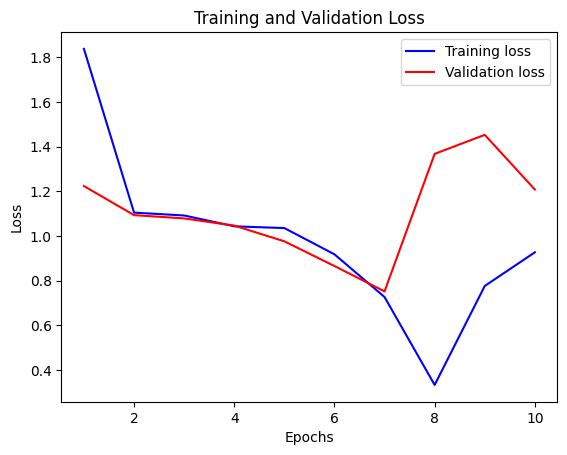

In [22]:
# Extracting training and validation loss history
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

# Creating epochs range for x-axis
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

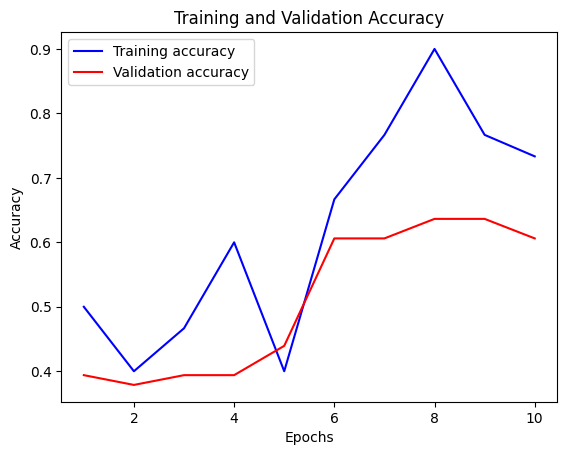

In [21]:
# Extracting training and validation accuracy history
train_acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

# Creating epochs range for x-axis
epochs = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Saving Base Model

In [26]:
model.save('my_vgg16_model.h5')